In [1]:
import pandas as pd
import numpy as np
import spacy
pd.set_option('display.width',1000)
pd.set_option('max_colwidth', 1000) 
nlp = spacy.load('en_core_web_sm')
import nltk
from nltk.corpus import stopwords
stpwrds = set(stopwords.words('english'))
stpwrds.discard('not')
stpwrds.discard('no')

In [3]:
%cd "BEPEC Python Material\"

C:\BEPEC Python Material


In [4]:
df = pd.read_csv('abcnews-date-text.csv' , nrows=10000)
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting licence
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


## Basic Statistics

<AxesSubplot:>

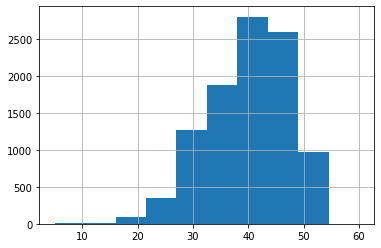

In [5]:
## Review length
df['headline_text'].apply(lambda x : len(x)).hist()

<AxesSubplot:>

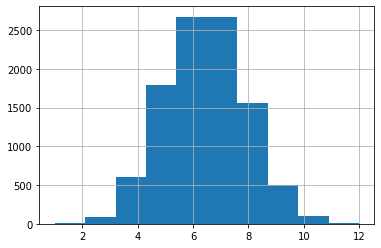

In [6]:
## word lenght
df['headline_text'].apply(lambda x : x.split()).apply(len).hist()

<AxesSubplot:>

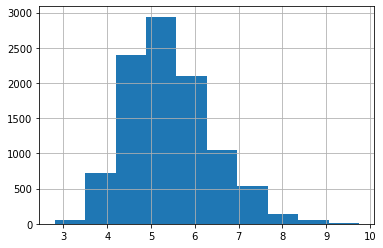

In [7]:
## Average word lenght
df['headline_text'].str.split().apply(lambda x:[len(i) for i in x]).apply(lambda x:np.mean(x)).hist()

In [8]:
from textblob import TextBlob
TextBlob(
'100 people killed in Iraq'
).sentiment

Sentiment(polarity=-0.2, subjectivity=0.0)

In [10]:
print(TextBlob('100 people killed in Iraq').sentiment.subjectivity)
print(TextBlob('100 people killed in Iraq').sentiment.polarity)

0.0
-0.2


<AxesSubplot:>

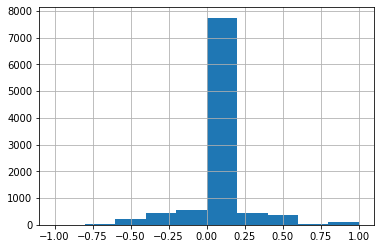

In [12]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity_score']=df['headline_text'].\
   apply(lambda x : polarity(x))
df['polarity_score'].hist()

<IPython.core.display.Javascript object>

<BarContainer object of 3 artists>

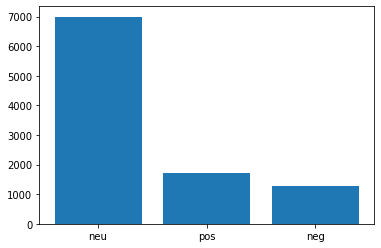

In [17]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
df['polarity']=df['polarity_score'].\
   map(lambda x: sentiment(x))
plt.bar(df['polarity'].value_counts().index,df['polarity'].value_counts())

<IPython.core.display.Javascript object>

C:\Users\Ali\.conda\envs\tensor_ali\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='polarity', ylabel='count'>

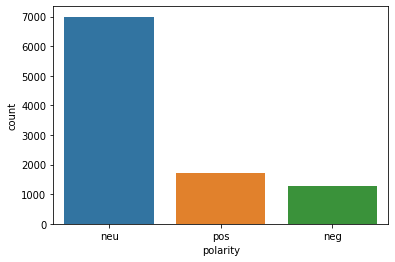

In [19]:
sns.countplot(df['polarity'])

In [23]:
df[df['polarity']=='pos']['headline_text'].sample(5)


7157                 more arrests over cannabis plantation
5081                      ganguly wants sri lanka in final
6433     church wants conscience vote on same sex adoption
2207    britain drafts controversial atlantic solution for
7914           tadpole find proves frogs surviving drought
Name: headline_text, dtype: object

In [24]:
df[df['polarity']=='neg']['headline_text'].sample(5)


8454    iraqis bought anti tank missiles in secret report
3821              howard talks down death penalty in aust
6252              fiji court finds pair guilty of treason
4832                     beach management change expected
7066            british soldier killed in riot near basra
Name: headline_text, dtype: object

{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.4215}
1


<IPython.core.display.Javascript object>

C:\Users\Ali\.conda\envs\tensor_ali\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='polarity', ylabel='count'>

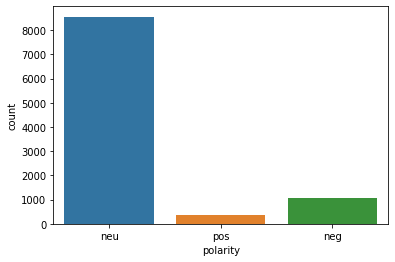

In [42]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = '100 people saved in Iraq'
#nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
ss = sid.polarity_scores(sent)
print(ss)
print(np.argmax(list(ss.values())[:-1]))
def get_vader_score(sent):
    ss = sid.polarity_scores(sent)
    return np.argmax(list(ss.values())[:-1])

df['polarity']=df['headline_text'].\
    map(lambda x: get_vader_score(x))
polarity=df['polarity'].replace({0:'neg',1:'neu',2:'pos'})
polarity
sns.countplot(polarity)